# Using Reverse Recommendation in Vector Search

For this blog, we will be classifying transactional data as normal and fraudulent. Dataset used in this blog can be downloaded from [here](https://www.kaggle.com/datasets/kartik2112/fraud-detection). 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from os.path import join as pjoin

In [2]:
root = '/home/quamer23nasim38/reverse-recommendation-for-anomaly-detection/'
data_path = 'data/fraudTrain.csv'

In [3]:
df = pd.read_csv(pjoin(root, data_path))

Let's fist understand the dataset. We have a credit card transaction dataset containing the information about the transaction, the card holder, the merchant, and the location of the transaction. The dataset looks like this

<img src="images/dfhead.png" alt="dfhead" width="1500"/>

Essentially, we have 5 types of major information  for a particular transaction: Customer Basic Information, Customer Residence Information, Merchant Information, Transaction Information, and Transaction Location Information.

Text(1, 1299169, '99.42%')

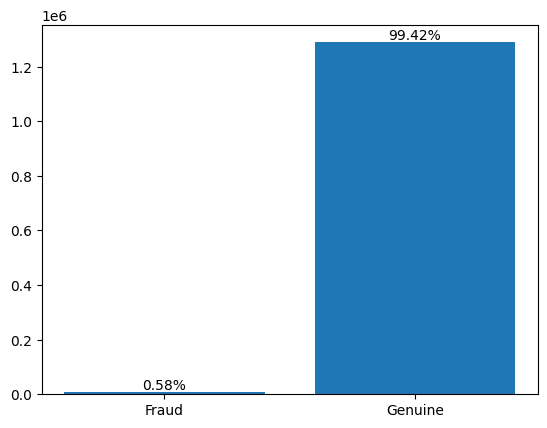

In [28]:
fraud_vs_genuine = df.is_fraud.value_counts()
fraud_counts = fraud_vs_genuine[1]
genuine_counts = fraud_vs_genuine[0]
plt.bar(['Fraud', 'Genuine'], [fraud_counts, genuine_counts])
plt.text(0, fraud_counts+10000, f"{round(fraud_counts/(fraud_counts+genuine_counts)*100, 2)}%", ha='center')
plt.text(1, genuine_counts+10000, f"{round(genuine_counts/(fraud_counts+genuine_counts)*100, 2)}%", ha='center')

Here we can see that the number of fraud transactions is awfully low (0.58%) compared to the number of non-fraud transactions (99.42%). This is a highly imbalanced dataset, very common in fraud detection problems and very challenging to solve in a supervised learning context. This is why we will now build a anomaly detection system that will be able to detect frauds in this dataset.